We start uploading the libraries we need for our analysis. 
While os and re are built-in libraries, basemap, numpy, pygrib, matplotlib and IPython have to be installed first.

In [1]:
import pygrib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import os
import re
from IPython.display import HTML

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


As first step, we define the path of the folder where we have stored grib data.

In [2]:
os.chdir("/home/gloria/Copernicus_UV_data/data")

Using Basemap, we define the projection system and the bounding box of our map. 
We have chosen the Cylindrical Equidistant Projection. 
We can also add the lines for coast, meridians and parallels.

In [3]:
plt.figure(figsize=(30,21))

m=Basemap(projection='cyl', llcrnrlon=0, \
  urcrnrlon=360,llcrnrlat=-90,urcrnrlat=90, \
  resolution='c')

m.drawcoastlines()
m.drawmapboundary()
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))

{-90: ([<matplotlib.lines.Line2D at 0x7f12ccd867d0>], []),
 -60: ([<matplotlib.lines.Line2D at 0x7f12ccd3e9d0>], []),
 -30: ([<matplotlib.lines.Line2D at 0x7f12ccd3ef50>], []),
 0: ([<matplotlib.lines.Line2D at 0x7f12ccd4c5d0>], []),
 30: ([<matplotlib.lines.Line2D at 0x7f12ccd4cc10>], []),
 60: ([<matplotlib.lines.Line2D at 0x7f12cccd7290>], [])}

We are going to read now a grib z_cams_c_ecmf_20180204000000_prod_fc_sfc_003_uvbed.grib. 

This file contains forecasting data about the biological effective dose. 
In particular we are going to plot the values of UVI 3 hours after the 00:00, time on Greenwich, of the day February 4th 2018. 

In [4]:
grib='z_cams_c_ecmf_20180204000000_prod_fc_sfc_003_uvbed.grib' # Set the file name of your input GRIB file
grbs=pygrib.open(grib)
for grb in grbs: grb

In order to plot data on the map, we need to extract latitude, longitude and values for each pixel. 
one pixel have the spatial resolution of 0,4 degree. 

In [5]:
lats, lons = grb.latlons()
grb = grbs.select()[0]
data=grb.values

To plot the data on UVI, we need to execute a simple operation: we just divide the biological efective dose for 0.025. 

In [6]:
scalar = 0.025
data2= data / scalar

and we will have as ouput UVI values. 
Now we give a scaled color to the map and we put its legend below.  

In [7]:
x, y = m(lons,lats)
cmap = plt.get_cmap('coolwarm')
cs = m.pcolormesh(x,y,data2,shading='flat',cmap=cmap)
plt.colorbar(cs,orientation='horizontal', shrink=0.5, label = "VALUES")

We also define the title of the plot.

In [8]:
time = re.findall('(time [a-z0-9: ]*)', str(grb))
title = "UV INDEX for day " + time[0]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

plt.title(title, fontdict = font)

And we can see in the end the result of our analysis. 

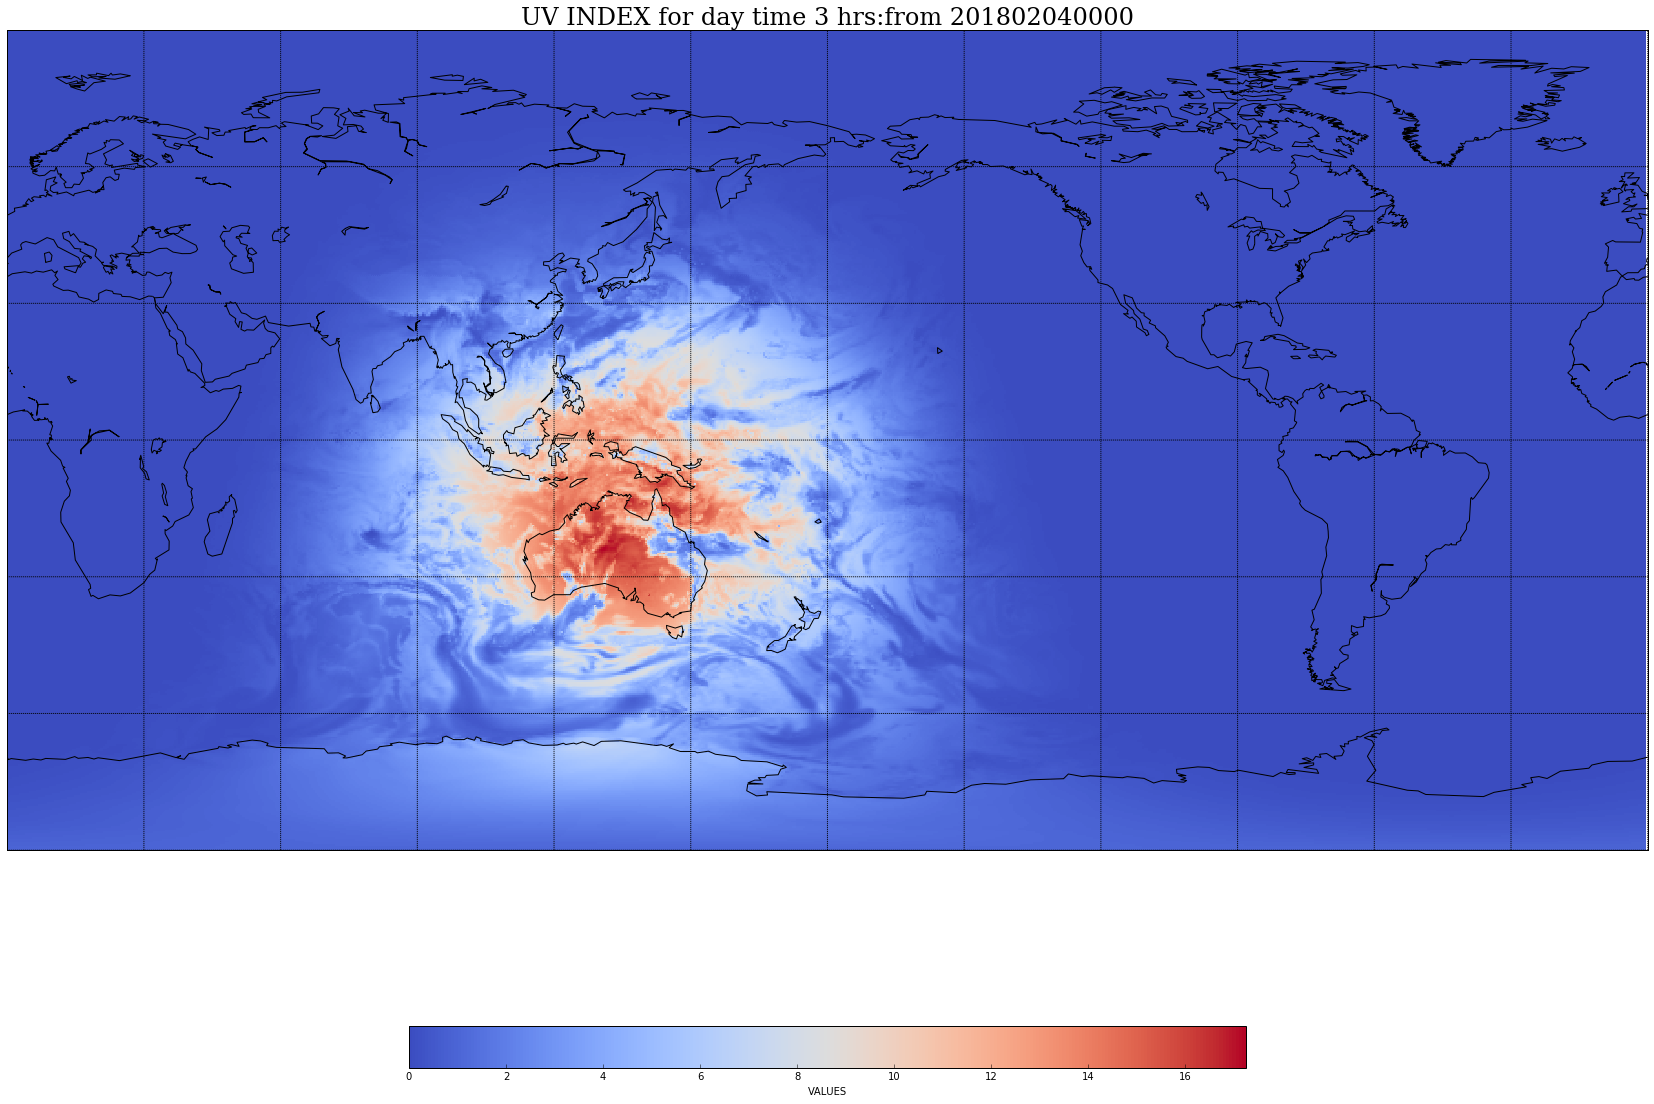

In [9]:
plt.show()

we can now use the code below to read all the grib files presents on our folder, make our calculation, plot the data into an animation and save the results as a gif in the same directory.
At the end of the processing you will see the the output file on your folder with the name animation_UV.gif.

<IPython.core.display.Javascript object>


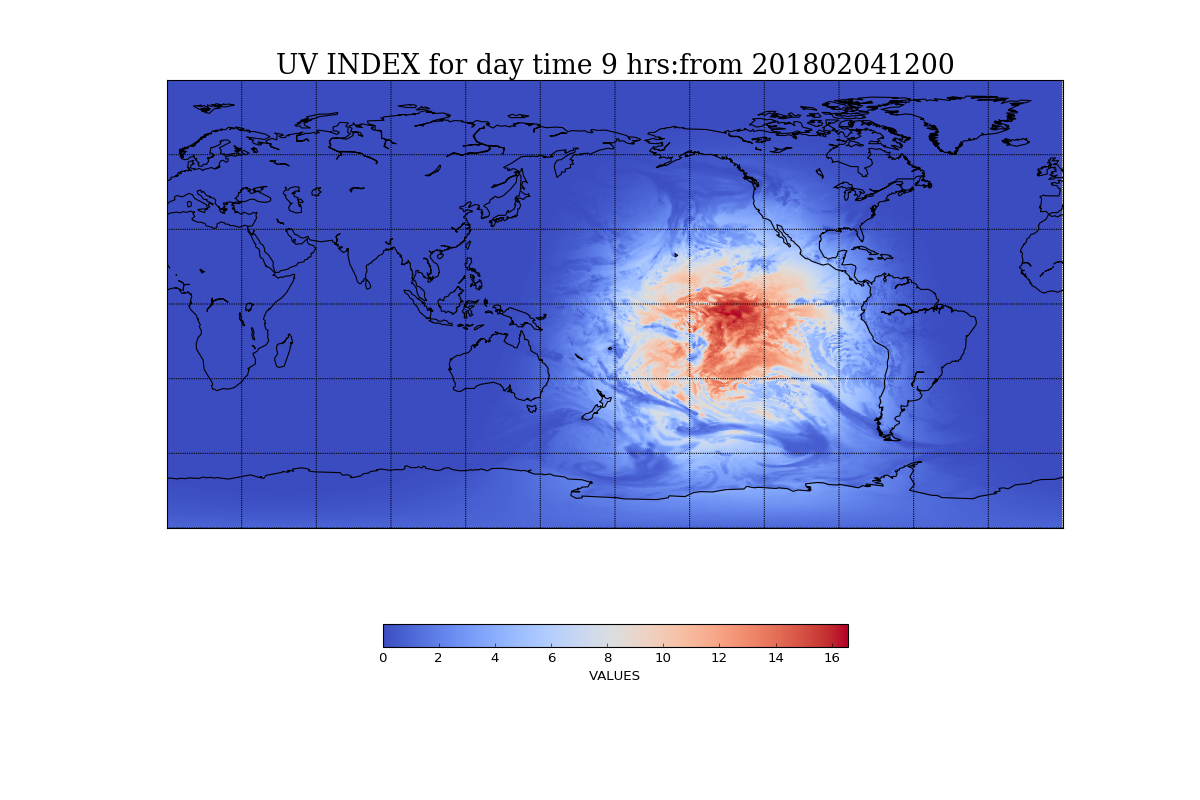

In [10]:
%matplotlib notebook

plt.figure(figsize=(15,10))
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

griblist = os.listdir("/home/gloria/UV_CAMS/data")
levelist = []
for grb in sorted(griblist, key=numericalSort):
    grbs=pygrib.open(grb)
    for grb in grbs: levelist.append(grb)

m=Basemap(projection='cyl', llcrnrlon=0, \
  urcrnrlon=360,llcrnrlat=-90,urcrnrlat=90, \
  resolution='c')

m.drawcoastlines()
m.drawmapboundary()
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))
        
grib='z_cams_c_ecmf_20180204000000_prod_fc_sfc_010_uvbed.grib' # Set the file name of your input GRIB file
grbs=pygrib.open(grib)
for grb in grbs: grb
lats, lons = grb.latlons()
grb = grbs.select()[0]
data=grb.values
scalar = 0.025
data2= data / scalar
x, y = m(lons,lats)
cmap = plt.get_cmap('coolwarm')
cs = m.pcolormesh(x,y,data2,shading='flat',cmap=cmap)
plt.colorbar(cs,orientation='horizontal', shrink=0.5, label = "VALUES")

def animate (i):
    grb = levelist[i]
    lats, lons = grb.latlons()
    x, y = m(lons, lats)
    data = grb.values/ 0.025
    cmap = plt.get_cmap('coolwarm')
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=cmap)
    time = re.findall('(time [0-9]*)', str(grb))
    time2 = re.findall('(time [a-z0-9: ]*)', str(grb))
    title = "UV INDEX for day " + time2[0]
    plt.title(title, fontdict = font)

anim = animation.FuncAnimation(plt.gcf(), animate,
                               frames=len(levelist), interval=250)

anim.save('animation_UV.gif', writer='imagemagick')


plt.show()


